### The key of this notebook is to show how to use a pre-defined time gap to identify a user session

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random

from datetime import datetime, timedelta

In [4]:
date_columns = ['timestamp']  # specify which column should be parsed as datetime
user_log = pd.read_csv("sample.csv", sep=',', parse_dates=date_columns)
print("******user log summary*******")
user_log.info()
user_log.head()

******user log summary*******
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
user_id         100 non-null object
from_page       100 non-null object
action          100 non-null object
current_page    100 non-null object
timestamp       100 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 4.0+ KB


,user_id,from_page,action,current_page,timestamp
0,1689459f31fe58f48973ed60da12981d,\N,MyMirror-TestFace-ReportPage-SwitchStyle,MyMirror-TestFace-ReportPage,2019-07-01 15:53:39
1,d17aebb7be63d76082b8d28ab679aec2,\N,MyMirror-TestFace-ReportPage-DragDown,MyMirror-TestFace-ReportPage,2019-07-01 17:43:52
2,7003db4e2fe2552bb1ba00661bb5e9be,\N,MyMirror-PicturePage-TabClick,MyMirror-PicturePage,2019-07-01 17:52:36
3,c795227897a6942074992c8c43460939,\N,MyMirror-TestFace-ReportPage-SwitchStyle,MyMirror-TestFace-ReportPage,2019-07-01 19:09:42
4,693a2a93be242871a824131d438f09ac,MyMirror-SimulateStyle-SimulateStylePage,MyMirror-SimulateStyle-SimulateStylePage-DragUp,MyMirror-SimulateStyle-SimulateStylePage,2019-07-01 21:06:51


In [5]:
user_log.describe()

,user_id,from_page,action,current_page,timestamp
count,100,100,100,100,100
unique,95,9,19,10,100
top,dc8848d5316bf36cda5c7d73b32efc26,\N,MyMirror-TestFace-ReportPage-SwitchStyle,MyMirror-TestFace-ReportPage,2019-07-01 08:06:39
freq,2,76,31,54,1
first,NaN,NaN,NaN,NaN,2019-07-01 00:10:36
last,NaN,NaN,NaN,NaN,2019-07-01 23:28:44


In [6]:
action_count = user_log['action'].value_counts()
action_count

MyMirror-TestFace-ReportPage-SwitchStyle                                          31
MyMirror-TestFace-ReportPage-DragDown                                             22
MyMirror-PicturePage-TakePhotoButtonClick                                         10
MyMirror-SimulateStyle-SimulateStylePage-DragUp                                    9
MyMirror-PicturePage-TabClick                                                      8
MyMirror-PicturePage-CheckPhotoAlbum                                               5
LoginRegister-MagicMirrorRegister-ChooseRecommendTagPage-SlideSwitchTag            3
CompanyApp-MagicMirror-FacePackageDownloadSucess-SystemEvent                       1
MyMirror-SimilarFaceSearch-AnalysisResultPage-CelebAvatarClick                     1
MyMirror-TestFace-ReportPage-CheckDetailsClick                                     1
LoginRegister-MagicMirrorRegister-ChooseRecommendCelebPage-EnterFrontPageClick     1
LoginRegister-MagicMirrorRegister-ChooseRecommendTagPage-StartMag

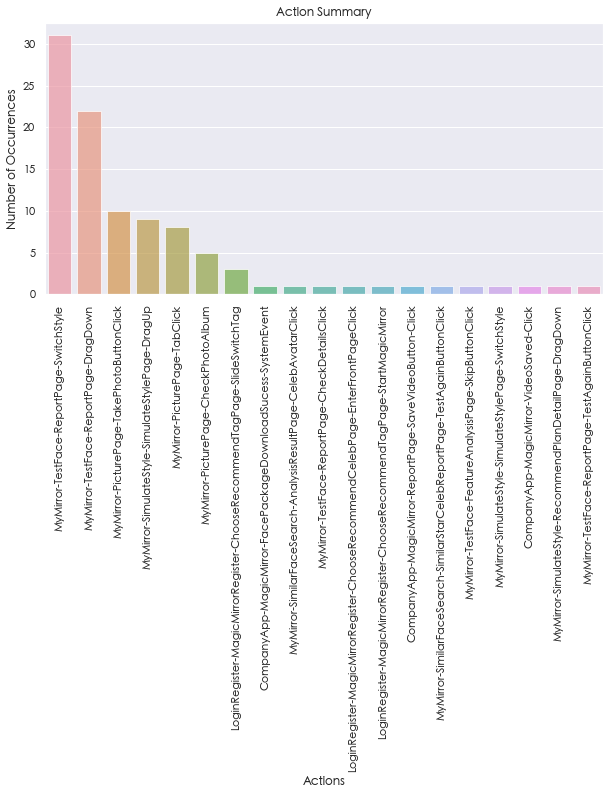

In [8]:
plt.figure(figsize=(10,5))
#sns.set(font="Heiti TC") # set font to Heiti to show chinese
ax = sns.barplot(action_count.index, action_count.values, alpha=0.7)
plt.title('Action Summary')
plt.ylabel('Number of Occurrences')
plt.xlabel('Actions')
plt.xticks(rotation=90)
plt.show()

In [9]:
# get a subset of the data for process mining
user_log_pm = user_log[["user_id", "action", "timestamp"]]
user_log_pm.sort_values(by=['timestamp'])
user_log_pm.head()

,user_id,action,timestamp
0,1689459f31fe58f48973ed60da12981d,MyMirror-TestFace-ReportPage-SwitchStyle,2019-07-01 15:53:39
1,d17aebb7be63d76082b8d28ab679aec2,MyMirror-TestFace-ReportPage-DragDown,2019-07-01 17:43:52
2,7003db4e2fe2552bb1ba00661bb5e9be,MyMirror-PicturePage-TabClick,2019-07-01 17:52:36
3,c795227897a6942074992c8c43460939,MyMirror-TestFace-ReportPage-SwitchStyle,2019-07-01 19:09:42
4,693a2a93be242871a824131d438f09ac,MyMirror-SimulateStyle-SimulateStylePage-DragUp,2019-07-01 21:06:51


In [10]:
grouped_id = user_log_pm.groupby(['user_id'])
grouped_id.first()
#grouped_id.get_group('00017120d976b10697170f7fa30a6270')  # one user's clickstream

,action,timestamp
user_id,,
0293cb11b88a1edb82f51d845b4c92c9,MyMirror-TestFace-ReportPage-SwitchStyle,2019-07-01 07:42:13
05619fc488d5c138fa1d015eee136210,MyMirror-SimulateStyle-SimulateStylePage-DragUp,2019-07-01 12:05:29
0626bc330b6b9e0190da7c706b1b382d,MyMirror-TestFace-ReportPage-TestAgainButtonClick,2019-07-01 00:36:44
0849aafa6370553c54f79eb1a0331f21,MyMirror-PicturePage-TakePhotoButtonClick,2019-07-01 00:17:21
09864edcf445665276726074f275abf4,MyMirror-TestFace-ReportPage-SwitchStyle,2019-07-01 09:45:42
...,...,...
f7110f40b1012642bcf8691a287927c9,MyMirror-PicturePage-TakePhotoButtonClick,2019-07-01 01:56:11
f87d6095099b9ccfcaff9e5ed2c04651,MyMirror-TestFace-ReportPage-DragDown,2019-07-01 11:41:28
faa8a1a66ddb1b6d791d804153eb0c72,MyMirror-PicturePage-TakePhotoButtonClick,2019-07-01 11:13:21


In [11]:
#%%time
#grouped_id.describe()  # not useful and slow

In [12]:
%%time
gap = timedelta(minutes=30) # time gap to identify a user session 
click_pm_log = []
sid = 0 # initial session id

for name, group in grouped_id:
    uid = name # user id
    group = group.sort_values(by=['timestamp']) 
    
    # the logic is: 
    # adding a new column if the gap is greater then set to True
    # then change False to 0 and True to 1, such as 0010001001 where 1 is the gap
    # then use cumsum to seperate the session 0010001001 --> 0011112223

    group.loc[:,'session'] = group.loc[:,'timestamp'].diff() > gap
    group.loc[:,'session'] = group.loc[:,'session'].apply(lambda x: 1 if x else 0).cumsum()
    #print(group)
    sub_group = group.groupby(['session'])
    for name, session in sub_group:
        for index, row in session.iterrows(): 
            #print("&&&&&&&&&&&&", sid, row["action"], row["timestamp"], uid)
            click_pm_log.append([sid, row["action"], row["timestamp"], uid])
        sid +=1

CPU times: user 569 ms, sys: 6.47 ms, total: 575 ms
Wall time: 584 ms


In [31]:
click_pm_log[:4]

[[0,
  'MyMirror-TestFace-ReportPage-SwitchStyle',
  Timestamp('2019-07-01 07:42:13'),
  '0293cb11b88a1edb82f51d845b4c92c9'],
 [1,
  'MyMirror-SimulateStyle-SimulateStylePage-DragUp',
  Timestamp('2019-07-01 12:05:29'),
  '05619fc488d5c138fa1d015eee136210'],
 [2,
  'MyMirror-TestFace-ReportPage-TestAgainButtonClick',
  Timestamp('2019-07-01 00:36:44'),
  '0626bc330b6b9e0190da7c706b1b382d'],
 [3,
  'MyMirror-PicturePage-TakePhotoButtonClick',
  Timestamp('2019-07-01 00:17:21'),
  '0849aafa6370553c54f79eb1a0331f21']]

In [32]:
pm_log=pd.DataFrame(click_pm_log)

In [33]:
pm_log.head()

,0,1,2,3
0,0,MyMirror-TestFace-ReportPage-SwitchStyle,2019-07-01 07:42:13,0293cb11b88a1edb82f51d845b4c92c9
1,1,MyMirror-SimulateStyle-SimulateStylePage-DragUp,2019-07-01 12:05:29,05619fc488d5c138fa1d015eee136210
2,2,MyMirror-TestFace-ReportPage-TestAgainButtonClick,2019-07-01 00:36:44,0626bc330b6b9e0190da7c706b1b382d
3,3,MyMirror-PicturePage-TakePhotoButtonClick,2019-07-01 00:17:21,0849aafa6370553c54f79eb1a0331f21
4,4,MyMirror-TestFace-ReportPage-SwitchStyle,2019-07-01 09:45:42,09864edcf445665276726074f275abf4


In [34]:
pm_log.to_csv("pm-log.csv", sep=',', header=False, index=False, encoding='utf-8')